# Tutorial 7: Nearest Neighbors
### Dr. Daugherity, PHYS 453 - Spring 2020

**REFERENCES**
* https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [1]:
# Load libraries  - NOTE that we're not using pandas or seaborn today!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import trees
from sklearn import datasets

# Dataset
Just like seaborn has built-in datasets for pandas dataframes, we can use sklearn's dataset module to get data in our (X,y) format.  We'll stick with iris (so we're not changing too many things at once)

In [2]:
X,y = datasets.load_iris(return_X_y=True)

In [3]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
y[:5]

array([0, 0, 0, 0, 0])

This is identical to the iris dataframe we get from seaborn, expect this comes in the format we need with no extra steps.  
You see we get all 4 features:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

and all 3 species (in order: Setosa, Versicolor, Virginica)


Just for easy visualization, I'm going to drop two features just like before, but we will keep all 3 species for fun


In [5]:
X = X[:,[2,0]]  # only save columns 2 and 0

# First Example

In [6]:
clf=neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Making predictions is easy, just pass it a new 2D array of features

In [7]:
X_pred = np.array([[6,7], [2,5], [4,6]])
clf.predict(X_pred)

array([2, 0, 1])

i.e. the first flower (petal length=6, sepal length=7) is class 2 (Virginica)

# Bigger K's

Since we average over k nearest neighbors, when k>1 we get two new things:
1. we average over outliers, so not every training point will be classified correctly 
2. we can measure a probability of our predictions

In [8]:
for k in [1,3,5,10]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    print(k, clf.score(X,y))

1 0.9933333333333333
3 0.96
5 0.9666666666666667
10 0.9533333333333334


The `score` function takes features X and correct classes y and returns the percentage of points classified correctly 

In [9]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X,y)
X_pred = np.array([[5,6]])
print(clf.predict(X_pred))
print(clf.predict_proba(X_pred))

[2]
[[0.  0.2 0.8]]


So for a flower with petal_length = 5 and sepal_length = 6, we predict it to be class 2 (Virginica) when k=5.  

The `predict_proba` function tells us the odds are 0% of class 0, 20% of class 1, and 80% of class 2.

In [10]:
dist, neigh = clf.kneighbors(X_pred,5)
print("Distances to closest 5 points are ", dist)
print("Indices of neighbors: ",neigh)
print("Classes of neighbors: ",y[neigh])

Distances to closest 5 points are  [[0.         0.1        0.14142136 0.14142136 0.2       ]]
Indices of neighbors:  [[119  83 127 149 138]]
Classes of neighbors:  [[2 1 2 2 2]]


In this example, the closest neighbor was training flower \#149 which is class 2.    
We also see why `predict_proba` reports 0%, 20%, and 80%: 1 of 5 neighbors is class 1, and 4 of 5 neighbors are class 2. 

# Comparison of K
Now we have all the tools to compare different k-values

In [11]:
# Borrow a color palette from the sklearn example
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

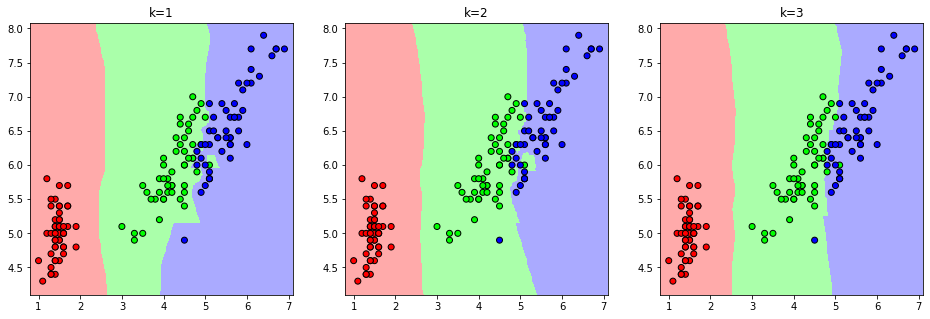

In [12]:
plt.figure(figsize=(16,5))
pltnum = 1

for k in [1,2,3]:
    plt.subplot(1,3,pltnum)
    pltnum+=1
    
    clf=neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)

    # Plot the decision boundary
    h = .02
    margin = 0.2
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k',cmap=cmap_bold) 
  
    #plt.legend()
    plt.title(f"k={k}")

#plt.savefig('knn-comp-HW3.png')
plt.show()